# Study of [EPIC211813818](https://exofop.ipac.caltech.edu/k2/edit_target.php?id=211813818)

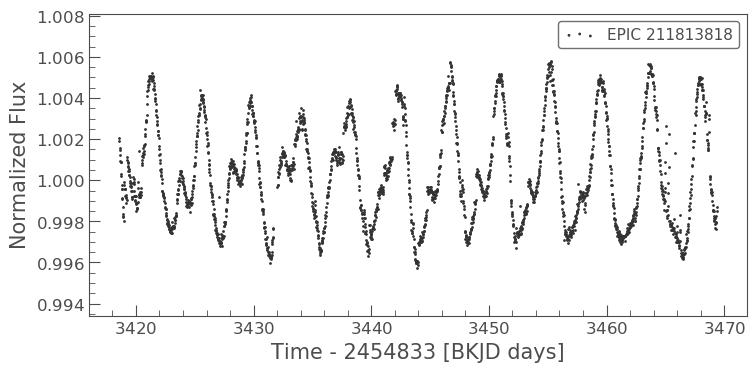

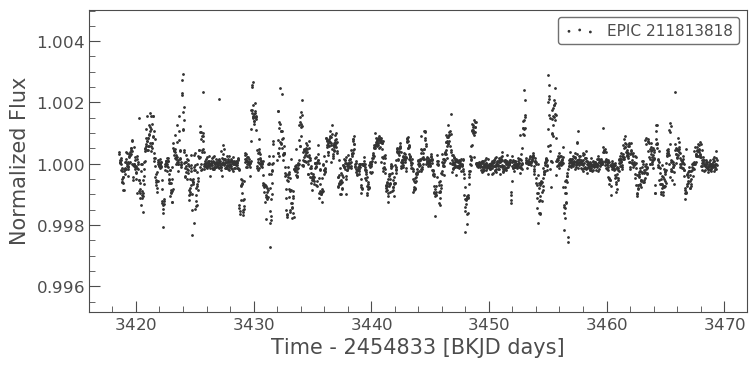

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
target = '211813818'

lcc = search_lightcurvefile(target).download_all()
lc = lcc[1].PDCSAP_FLUX.remove_nans()
lc.scatter()

corr_lc = lc.to_corrector("sff").correct(windows=40)
corr_lc_f, trend = corr_lc.flatten(window_length=401, return_trend=True)
corr_lc_f.scatter()

Best Fit Period: 10.6432 days


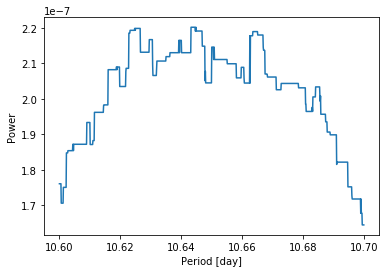

In [4]:
from astropy.stats import BoxLeastSquares
import matplotlib.pyplot as plt

bls = BoxLeastSquares(corr_lc_f.time, corr_lc_f.flux, corr_lc_f.flux_err)
periods = np.arange(10.6, 10.7, 0.0001)
durations = np.arange(0.005, 0.15, 0.001)
periodogram = bls.power(periods, durations)

plt.plot(periodogram.period, periodogram.power)
plt.ylabel("Power")
plt.xlabel("Period [day]");

period = periods[np.argmax(periodogram.power)]
print('Best Fit Period: {:0.4f} days'.format(period))

10.643199999999899

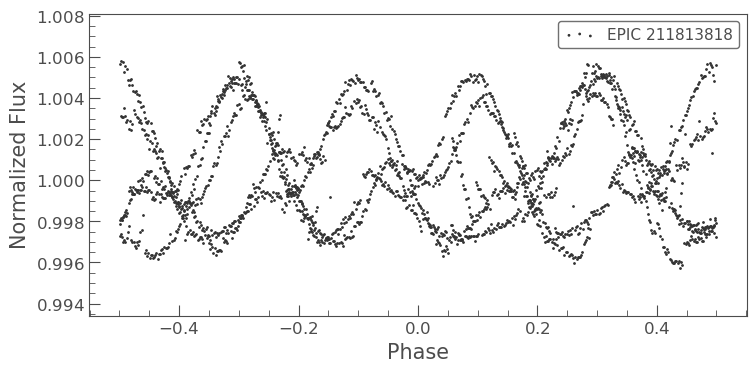

In [7]:
period_f = period 
lcf = lc.fold(period=period_f,t0=1.5)
lcf.scatter()
lcf.time_format = 'jd'
period_f

**Pulsating star or binary stars**